# Lesson 3 Exploratory Data Analysis

## Load AWS API Keys

Put keys in local or remote GDrive:  

`cp ~/.aws/credentials /Users/myname/Google\ Drive/awsml/`

### Mount GDrive


In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [0]:
import os;os.listdir("/content/gdrive/My Drive/awsml")

['kaggle.json', 'credentials', 'config']

### Install Boto

In [0]:
!pip -q install boto3


### Create API Config

In [0]:
!mkdir -p ~/.aws &&\
  cp /content/gdrive/My\ Drive/awsml/credentials ~/.aws/credentials 

### Test Comprehend API Call

In [0]:
import boto3
comprehend = boto3.client(service_name='comprehend', region_name="us-east-1")
text = "There is smoke in San Francisco"
comprehend.detect_sentiment(Text=text, LanguageCode='en')

{'ResponseMetadata': {'HTTPHeaders': {'connection': 'keep-alive',
   'content-length': '160',
   'content-type': 'application/x-amz-json-1.1',
   'date': 'Thu, 22 Nov 2018 00:21:54 GMT',
   'x-amzn-requestid': '9d69a0a9-edec-11e8-8560-532dc7aa62ea'},
  'HTTPStatusCode': 200,
  'RequestId': '9d69a0a9-edec-11e8-8560-532dc7aa62ea',
  'RetryAttempts': 0},
 'Sentiment': 'NEUTRAL',
 'SentimentScore': {'Mixed': 0.008628507144749165,
  'Negative': 0.1037612184882164,
  'Neutral': 0.8582549691200256,
  'Positive': 0.0293553676456213}}

## 3.1 Data Visualization

### AWS QuickSite



*   Business Intelligence Service
*   Creates Automated Visualizations



![Quicksite](https://user-images.githubusercontent.com/58792/49444530-4890e800-f784-11e8-900f-417edd143eb2.png)

#### [Demo] Quicksite

### Part of EDA Cycle

* used to detect outliers
* See data Distribution

[Demo] Plotly

In [0]:
df = pd.read_csv("https://raw.githubusercontent.com/noahgift/real_estate_ml/master/data/Zip_Zhvi_SingleFamilyResidence.csv")


**Clean Up DataFrame**
Rename RegionName to ZipCode and Change Zip Code to String



In [0]:
df.rename(columns={"RegionName":"ZipCode"}, inplace=True)
df["ZipCode"]=df["ZipCode"].map(lambda x: "{:.0f}".format(x))
df["RegionID"]=df["RegionID"].map(lambda x: "{:.0f}".format(x))
df.head()

,RegionID,ZipCode,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09
0,84654,60657,Chicago,IL,Chicago,Cook,1.0,420800.0,423500.0,426200.0,...,1097900.0,1098300.0,1094700.0,1088500.0,1081200.0,1073900.0,1064300.0,1054300.0,1048500.0,1044400.0
1,84616,60614,Chicago,IL,Chicago,Cook,2.0,542400.0,546700.0,551700.0,...,1522800.0,1525900.0,1525000.0,1526100.0,1528700.0,1526700.0,1518900.0,1515800.0,1519900.0,1525300.0
2,93144,79936,El Paso,TX,El Paso,El Paso,3.0,70900.0,71200.0,71100.0,...,114200.0,114300.0,114200.0,114000.0,113800.0,114000.0,114000.0,113800.0,113500.0,113300.0
3,84640,60640,Chicago,IL,Chicago,Cook,4.0,298200.0,297400.0,295300.0,...,739400.0,743100.0,741500.0,736300.0,729500.0,727700.0,726000.0,718800.0,713400.0,710900.0
4,61807,10467,New York,NY,New York,Bronx,5.0,NaN,NaN,NaN,...,391600.0,388900.0,388800.0,391100.0,394400.0,396900.0,398600.0,400500.0,402600.0,403700.0


In [0]:
median_prices = df.median()
marin_df = df[df["CountyName"] == "Marin"].median()
sf_df = df[df["City"] == "San Francisco"].median()
palo_alto = df[df["City"] == "Palo Alto"].median()
df_comparison = pd.concat([marin_df, sf_df, palo_alto, median_prices], axis=1)
df_comparison.columns = ["Marin County", "San Francisco", "Palo Alto", "Median USA"]

Install **Cufflinks**

Cell configuration to setup Plotly
Further documentation available from [Google on Plotly Colab Integration](https://colab.research.google.com/notebooks/charts.ipynb#scrollTo=YVhMPxwa-wmS)



In [0]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
            },
          });
        </script>
        '''))


In [0]:
!pip -q uninstall -y plotly
!pip -q install plotly==2.7.0
!pip -q install --upgrade cufflinks

cufflinks 0.14.6 has requirement plotly>=3.0.0, but you'll have plotly 2.7.0 which is incompatible.


**Plotly visualization**

[Shortcut view of plot if slow to load](http://nbviewer.jupyter.org/github/noahgift/real_estate_ml/blob/648361ce7392a0af29ce79780e6e5159c1a378e9/notebooks/explore_zillow_data_sets.ipynb)

In [0]:
import cufflinks as cf
cf.go_offline()

from plotly.offline import init_notebook_mode
configure_plotly_browser_state()
init_notebook_mode(connected=False)


df_comparison.iplot(title="Bay Area Median Single Family Home Prices 1996-2017",
                    xTitle="Year",
                    yTitle="Sales Price",
                   #bestfit=True, bestfit_colors=["pink"],
                   #subplots=True,
                   shape=(4,1),
                    #subplot_titles=True,
                    fill=True,)

Output hidden; open in https://colab.research.google.com to view.

## 3.2 Clustering

In [0]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)
val_housing_win_df = pd.read_csv("https://raw.githubusercontent.com/noahgift/socialpowernba/master/data/nba_2017_att_val_elo_win_housing.csv");val_housing_win_df.head()
numerical_df = val_housing_win_df.loc[:,["TOTAL_ATTENDANCE_MILLIONS", "ELO", "VALUE_MILLIONS", "MEDIAN_HOME_PRICE_COUNTY_MILLIONS"]]

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
print(scaler.fit(numerical_df))
print(scaler.transform(numerical_df))

MinMaxScaler(copy=True, feature_range=(0, 1))
[[1.         0.41898148 0.68627451 0.08776879]
 [0.72637903 0.18981481 0.2745098  0.11603661]
 [0.41067502 0.12731481 0.12745098 0.13419221]
 [0.70531986 0.53472222 0.23529412 0.16243496]
 [0.73232332 0.60648148 0.14705882 0.16306188]
 [0.62487072 0.68981481 0.49019608 0.31038806]
 [0.83819102 0.47916667 0.17647059 0.00476459]
 [0.6983872  1.         0.7254902  0.39188139]
 [0.49678606 0.47453704 0.10784314 0.04993825]
 [0.72417286 0.08333333 1.         1.        ]
 [0.54749962 0.57638889 0.56862745 0.23139615]
 [0.60477873 0.06712963 0.88235294 0.31038806]
 [0.65812204 0.52083333 0.11764706 0.184816  ]
 [0.52863955 0.74768519 0.16666667 0.08156228]
 [0.70957335 0.64583333 0.0627451  0.13983449]
 [0.43166712 0.03240741 0.06666667 0.10657639]
 [0.20301662 0.33333333 0.         0.10350448]
 [0.31881029 0.61111111 0.35294118 0.09062441]
 [0.36376665 0.00462963 0.1372549  0.10350448]
 [0.27883458 0.43518519 0.05098039 0.00946649]
 [0.25319364 0

### Usupervized Learning Technique

*NBA Season Faceted Cluster Plot *

![Discovering Clusters in the NBA](https://user-images.githubusercontent.com/58792/40759110-6a93a2f8-6445-11e8-980b-ecbb1a2cc029.png)

* Used to reveal hidden patterns
* Can be used in Exploratory Data Analysis

### Elbow Plot 



*   Used to identify ideal cluster number
*   Diagnostic tool for Clustering




In [0]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=3)
kmeans = k_means.fit(scaler.transform(numerical_df))
val_housing_win_df['cluster'] = kmeans.labels_
val_housing_win_df.head()

,TEAM,GMS,PCT_ATTENDANCE,WINNING_SEASON,TOTAL_ATTENDANCE_MILLIONS,VALUE_MILLIONS,ELO,CONF,COUNTY,MEDIAN_HOME_PRICE_COUNTY_MILLIONS,COUNTY_POPULATION_MILLIONS,cluster
0,Chicago Bulls,41,104,1,0.888882,2500,1519,East,Cook,269900.0,5.20,0
1,Dallas Mavericks,41,103,0,0.811366,1450,1420,West,Dallas,314990.0,2.57,0
2,Sacramento Kings,41,101,0,0.721928,1075,1393,West,Sacremento,343950.0,1.51,1
3,Miami Heat,41,100,1,0.805400,1350,1569,East,Miami-Dade,389000.0,2.71,0
4,Toronto Raptors,41,100,1,0.813050,1125,1600,East,York-County,390000.0,1.10,0


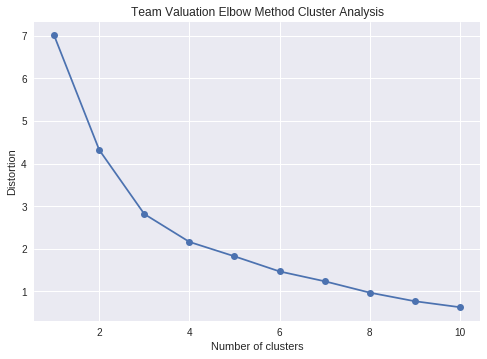

In [0]:
import matplotlib.pyplot as plt
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i,
            init='k-means++',
            n_init=10,
            max_iter=300,
            random_state=0)
    km.fit(scaler.transform(numerical_df))
    distortions.append(km.inertia_)
    
plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title("Team Valuation Elbow Method Cluster Analysis")
plt.show()

## 3.3 Summary Statistics

#### Used to Describe Data

In [0]:
numerical_df.median()

TOTAL_ATTENDANCE_MILLIONS                 0.724902
ELO                                    1510.500000
VALUE_MILLIONS                         1062.500000
MEDIAN_HOME_PRICE_COUNTY_MILLIONS    324199.000000
dtype: float64

In [0]:

numerical_df.max()

TOTAL_ATTENDANCE_MILLIONS                 0.889
ELO                                    1770.000
VALUE_MILLIONS                         3300.000
MEDIAN_HOME_PRICE_COUNTY_MILLIONS   1725000.000
dtype: float64

In [0]:
numerical_df.describe()

,TOTAL_ATTENDANCE_MILLIONS,ELO,VALUE_MILLIONS,MEDIAN_HOME_PRICE_COUNTY_MILLIONS
count,30.000,30.000,30.000,30.000
mean,0.733,1504.833,1355.333,407471.133
std,0.073,106.843,709.614,301904.127
min,0.606,1338.000,750.000,129900.000
25%,0.679,1425.250,886.250,271038.750
50%,0.725,1510.500,1062.500,324199.000
75%,0.801,1582.500,1600.000,465425.000
max,0.889,1770.000,3300.000,1725000.000


## 3.4 Implement Heatmap

### Used to compare Features

In [0]:
!pip -q install -U yellowbrick

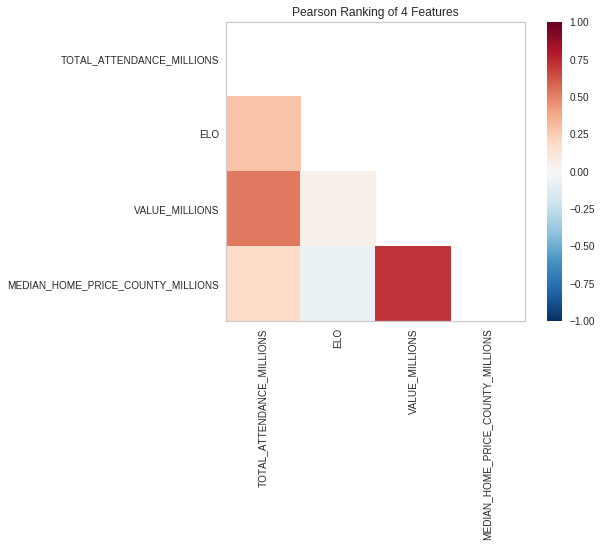

In [0]:
from yellowbrick.features import Rank2D

visualizer = Rank2D(algorithm="pearson")
visualizer.fit_transform(numerical_df)
visualizer.poof()

## 3.5 PCA (Principle Component Analysis)

Reduce Dimensions

*  AWS Sagemaker has capabilities
*  Deep Learning AMIs can create custom Solution



#### Use PCA with sklearn

References:



1.  [ PCA sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)





In [0]:
import pandas as pd
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(numerical_df)
X = pca.transform(numerical_df)
print(f"Before PCA Reduction{numerical_df.shape}")
print(f"After PCA Reduction {X.shape}")

Before PCA Reduction(30, 4)
After PCA Reduction (30, 2)


##### Simple Scatter Plot of Reduced Dimensions

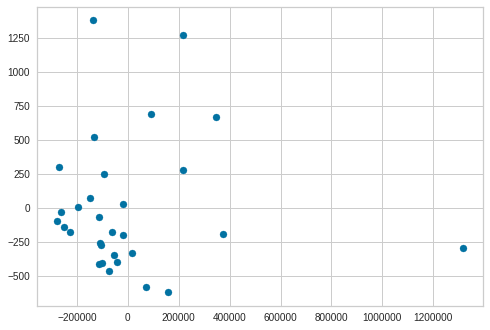

In [0]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()


## 3.6 Data Distributions

### Used to show shape and distribution

* What is the skew of the data?
* What modeling should acccount for this?

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



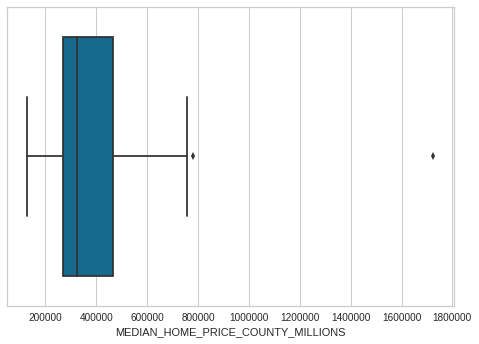

In [0]:
import seaborn as sns
sns.boxplot(numerical_df['MEDIAN_HOME_PRICE_COUNTY_MILLIONS'])

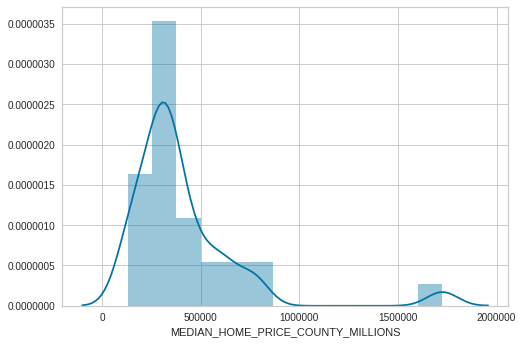

In [0]:
sns.distplot(numerical_df["MEDIAN_HOME_PRICE_COUNTY_MILLIONS"])

## 3.7 Data Normalizations

### Normalize Magnitude of data





*   Used to prepare data for Clustering
*   Without it distorting results from magnitude of one variable or column
*   Enables all variables to be treated the same



In [0]:
from sklearn.preprocessing import StandardScaler


In [0]:
StandardScaler?

In [0]:
scaler = StandardScaler()
print(scaler.fit(numerical_df))
print(scaler.transform(numerical_df))

## 3.8 Data Preprocessing


### Encoding Categorical Variables

* **Categorical (Discrete) Variables**
  - finite set of values:  `{green, red, blue}` or` {false, true}`
* Categorical Types:
  - Ordinal (ordered):  `{Large, Medium, Small}`
  - Nominal (unordered):  `{green, red, blue}`
* Represented as text 

  

### [Demo] Pandas preprocessing w/ Apply Function


No handles with labels found to put in legend.


Text(0.5,1,'NBA Players Ages')

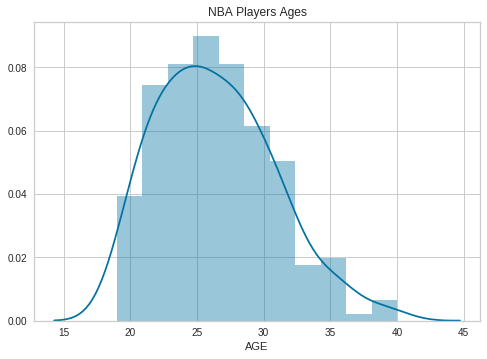

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("https://raw.githubusercontent.com/noahgift/socialpowernba/master/data/nba_2017_players_with_salary_wiki_twitter.csv")
sns.distplot(df.AGE)
plt.legend()
plt.title("NBA Players Ages")

In [0]:
def age_brackets (age):
  if age >17 and age <25:
      return 'Rookie'
  if age >25 and age <30:
      return 'Prime'
  if age >30 and age <35:
       return 'Post Prime'
  if age >35 and age <45:
      return 'Pre-Retirement'
      

In [0]:
df.columns

Index(['Unnamed: 0', 'Rk', 'PLAYER', 'POSITION', 'AGE', 'MP', 'FG', 'FGA',
       'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA',
       'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'POINTS',
       'TEAM', 'GP', 'MPG', 'ORPM', 'DRPM', 'RPM', 'WINS_RPM', 'PIE', 'PACE',
       'W', 'SALARY_MILLIONS', 'PAGEVIEWS', 'TWITTER_FAVORITE_COUNT',
       'TWITTER_RETWEET_COUNT'],
      dtype='object')

In [0]:
df["age_category"] = df["AGE"].apply(age_brackets)
df.groupby("age_category")["SALARY_MILLIONS"].median()

age_category
Post Prime       8.550
Pre-Retirement   5.500
Prime            9.515
Rookie           2.940
Name: SALARY_MILLIONS, dtype: float64